**Dawn Betzel**

**Capstone 2**


# Brain Tumor Classification Using Convolutional Neural Network
### About
A brain tumor is a mass or growth of abnormal cells in your brain. Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant).

Primary brain tumors originate in the brain itself or in tissues close to it, such as in the brain-covering membranes (meninges), cranial nerves, pituitary gland or pineal gland.

Primary brain tumors begin when normal cells develop changes (mutations) in their DNA. A cell's DNA contains the instructions that tell a cell what to do. The mutations tell the cells to grow and divide rapidly and to continue living when healthy cells would die. The result is a mass of abnormal cells, which forms a tumor.

In adults, primary brain tumors are much less common than are secondary brain tumors, in which cancer begins elsewhere and spreads to the brain.

### Diagnosis
Symptoms of brain tumors vary according to the type of tumor and the location. Because different areas of the brain control different functions of the body, where the tumor lies affects the symptoms you get.

Some tumors have no symptoms until they’re large and then cause a serious, rapid decline in health. Other tumors may have symptoms that develop slowly.

Accurate diagnosis should be done for detecting brain tumor to start proper treatment early, so as to improve the life expectancy of the patient. Best technique to diagnose for brain tumor is Magnetic Resource Imaging (MRI).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# What a brain tumor looks like
<img src = "https://www.cancer.gov/rare-brain-spine-tumor/sites/g/files/xnrzdm226/files/styles/cgov_article/public/cgov_image/media_image/100/200/7/files/Midline%20Glioma%20%28Article%29.jpg?h=b26af281&itok=D0zLgULJ" alt = "drawing" width = "400"/>

# Types of Brain tumor
#### Glioma is a type of tumor that occurs in the brain and spinal cord.
#### Pituitary is a tumor that forms in the pituitary gland near the brain that can cause changes in hormone levels in the body.
#### Meningioma is a tumor that forms on membranes that cover the brain and spinal cord just inside the skull.


In [ ]:
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
import os
from PIL import Image
from keras.preprocessing.image import img_to_array

In [ ]:
tumor = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]
root = '/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master'
path1 = root + '/Training/'
path2 = root + '/Testing/'
print(path1)
print(path2)

/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Training/
/content/drive/MyDrive/Brain-Tumor-Classification-DataSet-master/Brain-Tumor-Classification-DataSet-master/Testing/


# Image Processing

In [ ]:
Path = [
    root + '/Training/glioma_tumor/gg (104).jpg'  ,
    root + '/Training/meningioma_tumor/m (10).jpg',
    root + '/Training/no_tumor/image (12).jpg'    ,
    root + '/Training/pituitary_tumor/p (122).jpg',
]

In [ ]:
def display (img_array) :
    
    dim = 10
    
    plt.figure(figsize  = (dim , dim))
    for i, img in enumerate(img_array) :
        plt.subplot(2, 2, i+1)
        plt.imshow(img,'gray')
        plt.title(img.shape)
        
    plt.show()

In [ ]:
def get_array (path) :
    
    X = []
    y = []
    
    for typ, val in tumor :
        for image in os.listdir(path+typ) :
            img = cv2.resize(cv2.imread(path+typ+'/'+image, cv2.IMREAD_GRAYSCALE), (200,200))
            
            # create arrays
            X.append(img_to_array( Image.fromarray(img)))
            y.append(val)
    return X, y

In [ ]:
image_array = []
for i, image_path in enumerate(Path) :
    image_array.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (200,200)))

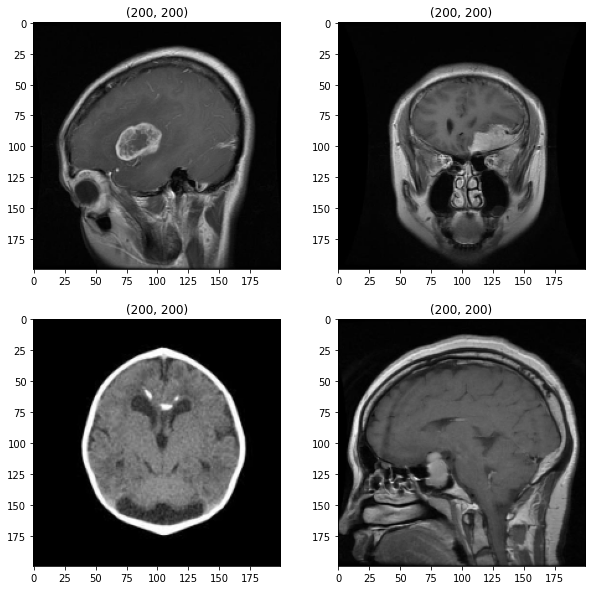

In [ ]:
display(image_array)

# Convert Images to Numpy arrays

In [ ]:
X_train, y_train = get_array(path1)

In [ ]:
X_test , y_test  = get_array(path2)

In [ ]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Scale the arrays

In [ ]:
X_train = np.array(X_train)
X_train/= 255.0

In [ ]:
y_train = np.array(keras.utils.to_categorical(y_train))

In [ ]:
X_test = np.array(X_test)
X_test/= 255.0

In [ ]:
y_test = np.array(keras.utils.to_categorical(y_test))

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2870, 200, 200, 1)
(2870, 4)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(394, 200, 200, 1)
(394, 4)


In [ ]:
info = {0 : 'Glioma tumor', 1 : 'Meningioma tumor', 2 : 'No tumor', 3 : 'Pituitary tumor'}

# Plots of some training samples

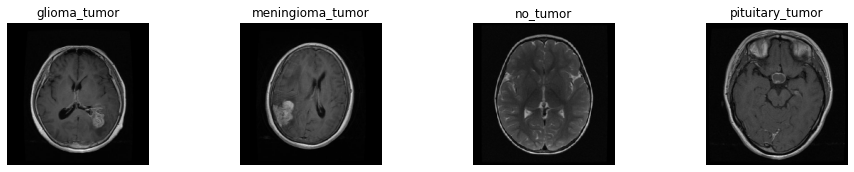

In [ ]:
plt.figure(figsize=(16, 12))

path = root + '/Training/'
fileNames = ['glioma_tumor/gg (10).jpg', 'meningioma_tumor/m (108).jpg', 'no_tumor/image (16).jpg', 'pituitary_tumor/p (12).jpg']
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv2.resize(img, (200, 200))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")

# Class frequency distribution

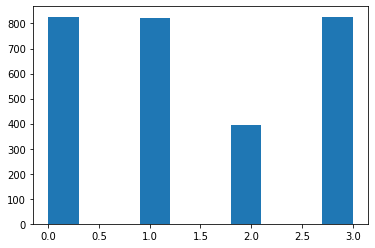

In [ ]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

# Synthetic Minority Oversampling
**Glioma tumor, Meningioma tumor** and **Pituitary tumor** almost same number of datasets ie. 826, 822 and 827 respectively. But the label **no_tumor** has only 395 samples. Since the number of samples for **no_tumor** class is less, let's oversample that class using SMOTE from imblearn package.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2870, 200, 200, 1)
(2870, 4)


In [ ]:
X_train = np.reshape(X_train, (2870, 200*200*1))
print(X_train.shape)
print(y_train.shape)

(2870, 40000)
(2870, 4)


In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1, k_neighbors = 5).fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3308, 40000)
(3308, 4)


In [ ]:
X_train = np.reshape(X_train, (3308, 200, 200, 1))
print(X_train.shape)
print(y_train.shape)

(3308, 200, 200, 1)
(3308, 4)


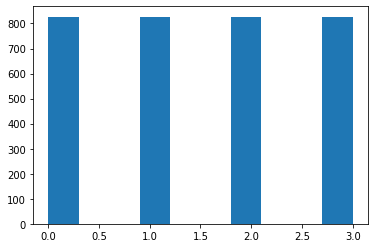

In [ ]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

# Images of test samples

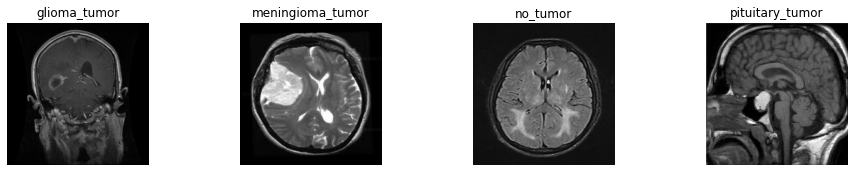

In [ ]:
plt.figure(figsize=(16, 12))

path = root + '/Testing/'
fileNames = ['glioma_tumor/image(68).jpg', 'meningioma_tumor/image(86).jpg', 'no_tumor/image(33).jpg', 'pituitary_tumor/image(70).jpg']
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv2.resize(img, (200, 200))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")

# Model creation and training

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Conv2D

In [ ]:
def conv_layer (filterx) :
    
    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))
    model.add(BatchNormalization())
    
    return model

In [ ]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [ ]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    
    model.add(Input((200,200,1,)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
    
    return model

# Use ImageDataGenerator for image data augmentation

In [ ]:
print(X_train.shape)
print(y_train.shape)

(3308, 200, 200, 1)
(3308, 4)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(zoom_range = [0.85, 1.0], rotation_range = 3)

In [ ]:
gen.fit(X_train)
train_gen = gen.flow(X_train, y_train, batch_size = 32)

In [ ]:
trainX, trainy = train_gen.next()

## Model implementation

In [ ]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./brain_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)

In [ ]:
model = cnn(128, 64, 32, 128, 64)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 100, 100, 128)     1792      
_________________________________________________________________
sequential_2 (Sequential)    (None, 50, 50, 64)        74048     
_________________________________________________________________
sequential_3 (Sequential)    (None, 25, 25, 32)        18592     
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 128)               2560640   
_________________________________________________________________
sequential_5 (Sequential)    (None, 64)                8512      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [ ]:
history = model.fit(gen.flow(X_train, y_train, batch_size = 32), epochs = 100, validation_data = (X_test,y_test), callbacks = [checkp])

Epoch 1/100
104/104 [==============================] - 64s 151ms/step - loss: 4.4657 - accuracy: 0.5819 - val_loss: 5.2391 - val_accuracy: 0.3071

Epoch 00001: val_accuracy improved from -inf to 0.30711, saving model to ./brain_model.h5
Epoch 2/100
104/104 [==============================] - 13s 126ms/step - loss: 3.8558 - accuracy: 0.7850 - val_loss: 5.8783 - val_accuracy: 0.2513

Epoch 00002: val_accuracy did not improve from 0.30711
Epoch 3/100
104/104 [==============================] - 13s 125ms/step - loss: 3.5901 - accuracy: 0.8244 - val_loss: 6.4410 - val_accuracy: 0.2944

Epoch 00003: val_accuracy did not improve from 0.30711
Epoch 4/100
104/104 [==============================] - 13s 125ms/step - loss: 3.3311 - accuracy: 0.8508 - val_loss: 5.5080 - val_accuracy: 0.4010

Epoch 00004: val_accuracy improved from 0.30711 to 0.40102, saving model to ./brain_model.h5
Epoch 5/100
104/104 [==============================] - 14s 135ms/step - loss: 3.1151 - accuracy: 0.8711 - val_loss: 5.0

Text(0.5, 1.0, 'Loss vs Epochs')

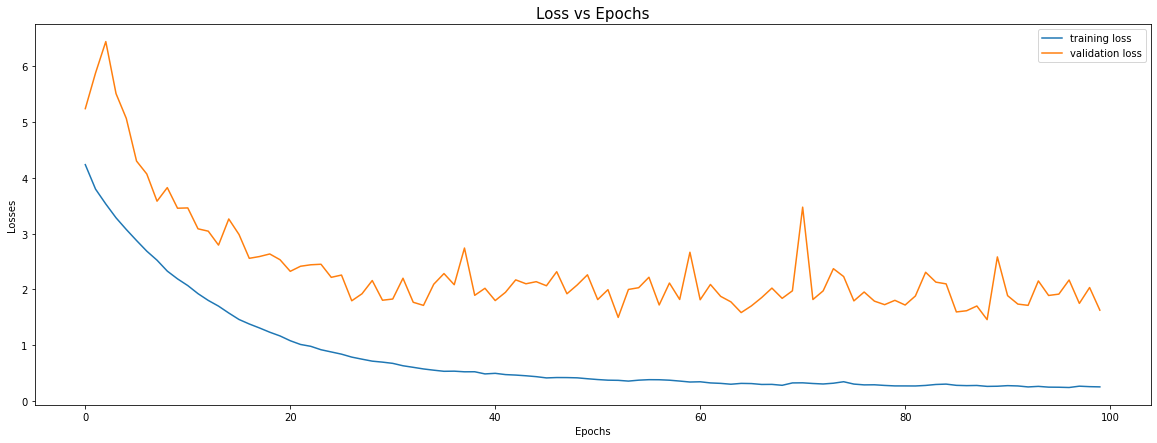

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss vs Epochs', fontsize = 15)

Text(0.5, 1.0, 'Accuracy vs Epochs')

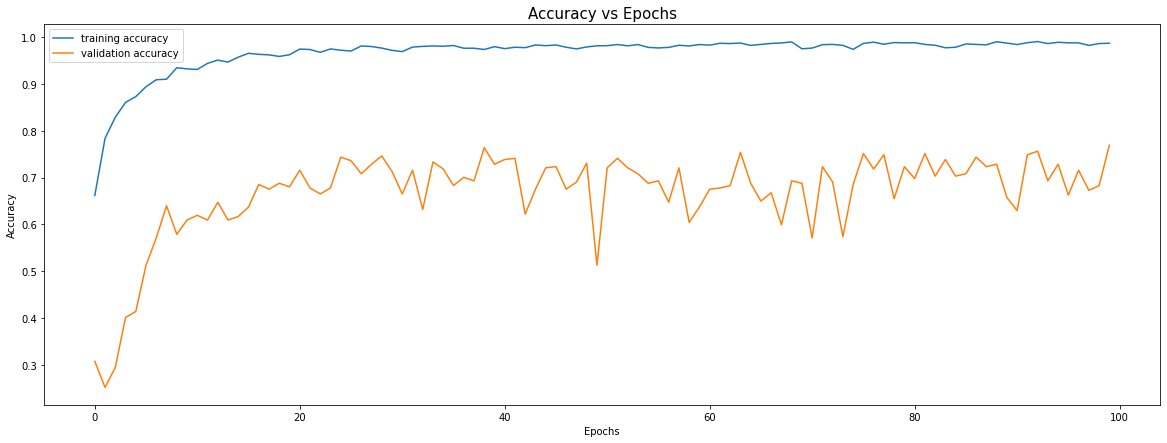

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs', fontsize = 15)

# Prediction

In [ ]:
from keras.models import load_model
model = load_model('./brain_model.h5')

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(pred[0:3,:])

[[6.9452770e-04 6.1905388e-02 9.2956382e-01 7.8362077e-03]
 [6.1447988e-04 5.7435207e-02 8.0659056e-01 1.3535966e-01]
 [1.4383641e-02 4.6141006e-02 9.3694741e-01 2.5279573e-03]]


In [ ]:
temp = np.argmax(pred, axis = 1)
pred = np.zeros(pred.shape)

In [ ]:
pred[np.arange(pred.shape[0]), temp] = 1

In [ ]:
print(pred[0:3,:])
print(y_test[0:3,:])

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy : ' + str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))

Accuracy : 0.7690355329949239
                  precision    recall  f1-score   support

    glioma_tumor       0.93      0.26      0.41       100
meningioma_tumor       0.80      0.91      0.85       115
        no_tumor       0.74      0.94      0.83       105
 pituitary_tumor       0.72      0.99      0.83        74

       micro avg       0.77      0.77      0.77       394
       macro avg       0.80      0.78      0.73       394
    weighted avg       0.80      0.77      0.73       394
     samples avg       0.77      0.77      0.77       394

